# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr.head(55)

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head(25)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN
5,59911784,0,29,1,0,0,0,0,Среднее,Гражданский брак,...,0,1,2,1,11,0,0,0,0,NaN
6,59911832,0,35,1,0,0,1,1,Высшее,Разведен(а),...,0,1,2,2,14,0,0,0,0,NaN
7,59912034,0,41,1,0,1,0,0,Среднее,Состою в браке,...,1,1,2,1,11,0,0,0,0,NaN
8,59912560,0,53,1,0,0,2,0,Высшее,Состою в браке,...,0,1,1,1,3,0,0,0,0,NaN
9,59912659,0,43,1,0,1,0,0,Среднее специальное,Состою в браке,...,0,1,1,1,6,0,0,0,0,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df_train['TARGET'].value_counts()

0    13411
1     1812
Name: TARGET, dtype: int64

In [11]:
df_test['TARGET'].value_counts()

0    13160
1     1750
Name: TARGET, dtype: int64

In [12]:
df = df_test.append(df_train).reset_index(drop=True)

In [13]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [15]:
'''
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку
'''

"\nfor i in df_train.columns: # перебираем все столбцы\n    if str(df_train[i].dtype) == 'object': # если тип столбца - object\n        print('='*10)\n        print(i) # выводим название столбца\n        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)\n        print('\n') # выводим пустую строку\n"

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [16]:
# df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

#### Ответ
Для начала давай посмотрим что это за пропуски и что за ними может скрываться

In [17]:
null_colums = df.columns[df.isnull().any()]
df[null_colums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 9 columns):
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object
REGION_NM                     30131 non-null object
WORK_TIME                     27416 non-null float64
PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64
dtypes: float64(2), object(7)
memory usage: 2.1+ MB


вижу совпадающие цифры
![title](img/300px-Kiselyov-2014_66401280_orig_.jpeg)
проверяем:

In [18]:
df[null_colums].T
# похоже что некоторые столбцы "работают синхронно" проверим

,0,1,2,3,4,5,6,7,8,9,...,30123,30124,30125,30126,30127,30128,30129,30130,30131,30132
GEN_INDUSTRY,Образование,NaN,Металлургия/Промышленность/Машиностроение,Другие сферы,Образование,NaN,Сборочные производства,Образование,NaN,Торговля,...,Другие сферы,Наука,Государственная служба,Сборочные производства,Металлургия/Промышленность/Машиностроение,Строительство,Здравоохранение,Торговля,NaN,Транспорт
GEN_TITLE,Специалист,NaN,Специалист,Специалист,Специалист,NaN,Специалист,Специалист,NaN,Рабочий,...,Рабочий,Специалист,Служащий,Специалист,Специалист,Специалист,Другое,Служащий,NaN,Специалист
ORG_TP_STATE,Государственная комп./учреж.,NaN,Частная компания,Государственная комп./учреж.,Государственная комп./учреж.,NaN,Государственная комп./учреж.,Государственная комп./учреж.,NaN,Индивидуальный предприниматель,...,Частная компания,Государственная комп./учреж.,Государственная комп./учреж.,Частная компания,Государственная комп./учреж.,Частная компания,Государственная комп./учреж.,Индивидуальный предприниматель,NaN,Частная компания
ORG_TP_FCAPITAL,Без участия,NaN,Без участия,Без участия,Без участия,NaN,Без участия,Без участия,NaN,Без участия,...,Без участия,Без участия,С участием,Без участия,Без участия,Без участия,Без участия,Без участия,NaN,Без участия
JOB_DIR,Участие в основ. деятельности,NaN,Участие в основ. деятельности,Участие в основ. деятельности,Вспомогательный техперсонал,NaN,Участие в основ. деятельности,Участие в основ. деятельности,NaN,Вспомогательный техперсонал,...,Вспомогательный техперсонал,Участие в основ. деятельности,Участие в основ. деятельности,Участие в основ. деятельности,Участие в основ. деятельности,Участие в основ. деятельности,Участие в основ. деятельности,Кадровая служба и секретариат,NaN,Участие в основ. деятельности
TP_PROVINCE,Красноярский край,Орловская область,Коми,Читинская область,Хабаровский край,Кировская область,Курганская область,Томская область,Омская область,Оренбургская область,...,Иркутская область,Белгородская область,Ульяновская область,Красноярский край,Тамбовская область,Воронежская область,Челябинская область,Брянская область,Приморский край,Ставропольский край
REGION_NM,ВОСТОЧНО-СИБИРСКИЙ,ЦЕНТРАЛЬНЫЙ 1,ЦЕНТРАЛЬНЫЙ 2,ВОСТОЧНО-СИБИРСКИЙ,ДАЛЬНЕВОСТОЧНЫЙ,ПРИВОЛЖСКИЙ,УРАЛЬСКИЙ,ЗАПАДНО-СИБИРСКИЙ,ЗАПАДНО-СИБИРСКИЙ,ПОВОЛЖСКИЙ,...,ВОСТОЧНО-СИБИРСКИЙ,ЦЕНТРАЛЬНЫЙ 1,ПОВОЛЖСКИЙ,ВОСТОЧНО-СИБИРСКИЙ,ЦЕНТРАЛЬНЫЙ 2,ЦЕНТРАЛЬНЫЙ 2,УРАЛЬСКИЙ,ЦЕНТРАЛЬНЫЙ 1,ДАЛЬНЕВОСТОЧНЫЙ,ЮЖНЫЙ
WORK_TIME,39,NaN,156,9,84,NaN,444,144,NaN,36,...,48,96,120,132,108,48,156,48,NaN,36
PREVIOUS_CARD_NUM_UTILIZED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df[(df['GEN_INDUSTRY'].isnull())]['TARGET'].count()

2713

In [20]:
df[(df['GEN_INDUSTRY'].isnull()) 
   & (df['GEN_TITLE'].isnull()) 
   & (df['ORG_TP_STATE'].isnull())
   & (df['ORG_TP_FCAPITAL'].isnull())
   & (df['JOB_DIR'].isnull())
   & (df['WORK_TIME'].isnull())
  ]['TARGET'].count()

2707

In [21]:
# так и есть, значит у нас есть группа выделяющихся примеров, 
# пометим эту группу отдельной меткой.
# тк WORK_TIME у нас float64 и это должно помочь выделить эту группу, 
# а NaN в других столбцах станет одной из категорией при категориальной обработке строковых значений
# оставшиеся 409 NAN примеров в WORK_TIME заменим медианой

#### теперь TP_PROVINCE и REGION_NM

In [22]:
df[(df['TP_PROVINCE'].isnull())]['TARGET'].count()
# примеров не много, можно выделить в категорию при категориальной обработке

590

In [23]:
df[(df['REGION_NM'].isnull())]['TARGET'].count()
# эти варианты вообще можно опустить

2

In [24]:
##### смотрим PREVIOUS_CARD_NUM_UTILIZED
# согласно описанию - это количество уже утилизированных карт. логично предположить что Nan - это 0, но проверим на всякий случай

In [25]:
df['PREVIOUS_CARD_NUM_UTILIZED'].value_counts() 

1.0    595
2.0      5
Name: PREVIOUS_CARD_NUM_UTILIZED, dtype: int64

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [26]:
# Да есть и их много, начнем с грубого отбара по количеству принимаемых значений

In [27]:
for colum in df.columns:
    c = len(df[colum].value_counts())
    if c < 100:
        print(len(df[colum].value_counts()), colum)

2 TARGET
47 AGE
2 SOCSTATUS_WORK_FL
2 SOCSTATUS_PENS_FL
2 GENDER
10 CHILD_TOTAL
8 DEPENDANTS
7 EDUCATION
5 MARITAL_STATUS
31 GEN_INDUSTRY
12 GEN_TITLE
5 ORG_TP_STATE
2 ORG_TP_FCAPITAL
10 JOB_DIR
5 FAMILY_INCOME
82 REG_ADDRESS_PROVINCE
83 FACT_ADDRESS_PROVINCE
82 POSTAL_ADDRESS_PROVINCE
70 TP_PROVINCE
11 REGION_NM
2 REG_FACT_FL
2 FACT_POST_FL
2 REG_POST_FL
2 REG_FACT_POST_FL
2 REG_FACT_POST_TP_FL
2 FL_PRESENCE_FL
3 OWN_AUTO
2 AUTO_RUS_FL
2 HS_PRESENCE_FL
2 COT_PRESENCE_FL
2 GAR_PRESENCE_FL
2 LAND_PRESENCE_FL
23 TERM
1 DL_DOCUMENT_FL
2 GPF_DOCUMENT_FL
2 FACT_PHONE_FL
2 REG_PHONE_FL
2 GEN_PHONE_FL
9 LOAN_NUM_TOTAL
10 LOAN_NUM_CLOSED
88 LOAN_NUM_PAYM
14 LOAN_DLQ_NUM
7 LOAN_MAX_DLQ
2 PREVIOUS_CARD_NUM_UTILIZED
2 sample


In [28]:
#### далее смотрим столбец по смылу и содержанию
#### в зависимости от этого будем по разному кодировать категорию (One hot encoding или LabelEncoder)

In [ ]:
df['LOAN_NUM_TOTAL'].value_counts() 

In [29]:
df['SOCSTATUS_WORK_FL'].value_counts() 
# тут вообще ничего делать не нужно, классический категориальный признак

1    27395
0     2738
Name: SOCSTATUS_WORK_FL, dtype: int64

In [30]:
df['EDUCATION'].value_counts() 
# тут можно обозначить цифрами от 1 до 7. LabelEncoder 
# тк в модели вполне может сработать правило если образование > 3 ...
# но станет ли тогда признак категориальным? ;)
# и One hot encoding сделаем чтоб позволить модели выбрать что ей лучше

Среднее специальное               12869
Среднее                            9255
Высшее                             6227
Неоконченное высшее                1053
Неполное среднее                    671
Два и более высших образования       51
Ученая степень                        7
Name: EDUCATION, dtype: int64

In [31]:
df['MARITAL_STATUS'].value_counts()
# тут One hot encoding ибо нет градации параметра

Состою в браке        18465
Не состоял в браке     7222
Разведен(а)            2566
Вдовец/Вдова           1182
Гражданский брак        698
Name: MARITAL_STATUS, dtype: int64

In [32]:
df['REGION_NM'].value_counts() 
# One hot encoding но не понятно чем ЦЕНТРАЛЬНЫЙ 1 отличаеться от ЦЕНТРАЛЬНЫЙ 2 и ЦЕНТРАЛЬНЫЙ ОФИС 

ЮЖНЫЙ                 4248
ЦЕНТРАЛЬНЫЙ 2         3839
ЗАПАДНО-СИБИРСКИЙ     3616
ЦЕНТРАЛЬНЫЙ 1         3284
ПОВОЛЖСКИЙ            2871
ПРИВОЛЖСКИЙ           2538
ВОСТОЧНО-СИБИРСКИЙ    2471
УРАЛЬСКИЙ             2441
ДАЛЬНЕВОСТОЧНЫЙ       2211
СЕВЕРО-ЗАПАДНЫЙ       2025
ЦЕНТРАЛЬНЫЙ ОФИС       587
Name: REGION_NM, dtype: int64

In [33]:
df['REG_ADDRESS_PROVINCE'].value_counts() 
# One hot encoding но может попробовать сократить количество категорий в этом столбце?
# когда вхождений меньше 100 - пометить как "другие"?

Краснодарский край             1307
Кемеровская область            1296
Алтайский край                  895
Читинская область               844
Приморский край                 787
Ростовская область              784
Свердловская область            701
Саратовская область             655
Вологодская область             627
Волгоградская область           614
Челябинская область             591
Воронежская область             568
Татарстан                       553
Омская область                  548
Кировская область               545
Тульская область                517
Оренбургская область            509
Архангельская область           492
Хабаровский край                479
Самарская область               471
Красноярский край               463
Башкирия                        460
Новосибирская область           435
Белгородская область            425
Курская область                 423
Иркутская область               420
Тюменская область               410
Тверская область            

In [34]:

# итого отобрал категориальные признаки 
# (в некоторых из них "категориальность" можно поставить под сомнение, но мало категориальных признаков не бывает :) )
'''
['SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'DEPENDANTS', 'EDUCATION', 
                'GEN_TITLE', 'GEN_INDUSTRY', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 
                'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
                'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL',
'FACT_POST_FL',
'REG_POST_FL',
'REG_FACT_POST_FL',
'REG_FACT_POST_TP_FL',
'FL_PRESENCE_FL',
'AUTO_RUS_FL',
'HS_PRESENCE_FL',
'COT_PRESENCE_FL',
'GAR_PRESENCE_FL',
'LAND_PRESENCE_FL',
'GPF_DOCUMENT_FL',
'FACT_PHONE_FL',
'REG_PHONE_FL',
'GEN_PHONE_FL']
'''
# на обработку: 
    #* One hot encoding: 
encoding_columns = ['MARITAL_STATUS','GEN_INDUSTRY', 'GEN_TITLE',
              'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR',
               'EDUCATION','FAMILY_INCOME','REG_ADDRESS_PROVINCE', 
                  'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
                'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM']
    #* LabelEncoder: 
lb_encoding_columns = ['EDUCATION', 'FAMILY_INCOME']

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [35]:
encoding_columns=['MARITAL_STATUS','GEN_INDUSTRY', 'GEN_TITLE',
              'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR',
               'EDUCATION','FAMILY_INCOME','REG_ADDRESS_PROVINCE', 
                  'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
                'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM']

def convert_to_float(df, column):
    return df[column].map(lambda x: x.replace(',', '.')).astype('float')

def preproc_data(df_input):
    df_output = df_input.copy()
    # 1. Удаляем идентификатор AGREEMENT_RK
    df_output = df_output.drop('AGREEMENT_RK', axis = 1)

    # 2. Избавлялась от проблем с '.' и ',' 
    #в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    convert_columns=['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']

    for column in convert_columns:
        df_output[column] = convert_to_float(df_output, column)

    # 3. Выделяем группу где пропуски
    df_output['NAN_GROUP']=0
    df_output.loc[df_output['GEN_INDUSTRY'].isnull()
                  & df_output['GEN_TITLE'].isnull()
                  & df_output['ORG_TP_STATE'].isnull()
                  & df_output['ORG_TP_FCAPITAL'].isnull()
                  & df_output['JOB_DIR'].isnull()
                  & df_output['WORK_TIME'].isnull(), 'NAN_GROUP'] = 1

    # 4. LabelEncoder    
    tmp_list = list(set(df_output['EDUCATION']))
    df_output['EDUCATION'] = df_output.EDUCATION.apply(lambda x: tmp_list.index(x))

    tmp_list = list(set(df_output['FAMILY_INCOME']))
    df_output['FAMILY_INCOME'] = df_output.FAMILY_INCOME.apply(lambda x: tmp_list.index(x))
    
    # 5. Убираем Nan
    # для WORK_TIME сделаем 2 варианта с median и 0, посмотрим что будет лучше для модели
    df_output['WORK_TIME_nan_median'] = df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].median())
    df_output.loc[df_output['GEN_INDUSTRY'].isnull()
                  & df_output['GEN_TITLE'].isnull()
                  & df_output['ORG_TP_STATE'].isnull()
                  & df_output['ORG_TP_FCAPITAL'].isnull()
                  & df_output['JOB_DIR'].isnull()
                  & df_output['WORK_TIME'].isnull(), 'WORK_TIME_nan_median'] = 0
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(0)

    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)

    # 6. One hot encoding
    df_output = pd.get_dummies(df_output, columns=encoding_columns)

    
    return df_output

In [36]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [37]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 527 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(8), int64(32), uint8(487)
memory usage: 11.8 MB


In [38]:
df_train_preproc.columns[df_train_preproc.isnull().any()]

Index([], dtype='object')

In [39]:
df_train_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
14910,0,49,1,0,1,2,1,5000.0,1,1,...,0,0,1,0,0,0,0,0,0,0
14911,0,32,1,0,1,3,3,12000.0,1,1,...,0,0,0,0,0,0,0,0,0,1
14912,0,52,1,0,1,4,0,9000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
14913,0,39,1,0,1,1,1,25000.0,0,1,...,0,0,0,0,0,0,0,0,0,1
14914,0,30,1,0,0,0,0,12000.0,1,1,...,0,0,0,0,0,0,0,0,0,1


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [40]:
y = df_train_preproc.TARGET.values
X = df_train_preproc.drop(['TARGET'], axis=1)

y_test = df_test_preproc.TARGET.values
X_test = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
print(X_train.shape, y_train.shape)

(10656, 526) (10656,)


In [43]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier(random_state=42, max_depth=5)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_valid)
dtc_predict_proba = dtc.predict_proba(X_valid)

rfc = RandomForestClassifier(random_state=42, max_depth=15)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_valid)
rfc_predict_proba = rfc.predict_proba(X_valid)

lr = LogisticRegression(random_state=42, )
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_valid)
lr_predict_proba = lr.predict_proba(X_valid)

In [44]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
# V1

def print_accuracy_precision_recall (predict, name, y_valid):
    print (name)
    print ('accuracy: ', '\t', accuracy_score(y_valid, predict))
    print ('precision: ', '\t', precision_score(y_valid, predict))
    print ('recall: ', '\t', recall_score(y_valid, predict))
    print ('='*40)

print_accuracy_precision_recall (dtc_predict, 'DecisionTree', y_valid)
print_accuracy_precision_recall (rfc_predict, 'RandomForest', y_valid)
print_accuracy_precision_recall (lr_predict, 'LogisticRegression', y_valid)

DecisionTree
accuracy:  	 0.8738778191372892
precision:  	 0.18181818181818182
recall:  	 0.010810810810810811
RandomForest
accuracy:  	 0.8776001751696957
precision:  	 0.16666666666666666
recall:  	 0.0018018018018018018
LogisticRegression
accuracy:  	 0.877819137289249
precision:  	 0.2857142857142857
recall:  	 0.0036036036036036037


In [45]:
# Посчитать метрики стандартные
# accuracy, precision, recall
# V2

def calc_accuracy_precision_recall (y_valid, predict):
    return ([accuracy_score(y_valid, predict),
                     precision_score(y_valid, predict),
                     recall_score(y_valid, predict),])

df_metric = pd.DataFrame(index=['accuracy', 'precision', 'recall',])
df_metric['DecisionTree'] = calc_accuracy_precision_recall(y_valid, dtc_predict)
df_metric['RandomForest'] = calc_accuracy_precision_recall(y_valid, rfc_predict)
df_metric['LogisticRegression'] = calc_accuracy_precision_recall(y_valid, lr_predict)

df_metric

,DecisionTree,RandomForest,LogisticRegression
accuracy,0.873878,0.877600,0.877819
precision,0.181818,0.166667,0.285714
recall,0.010811,0.001802,0.003604


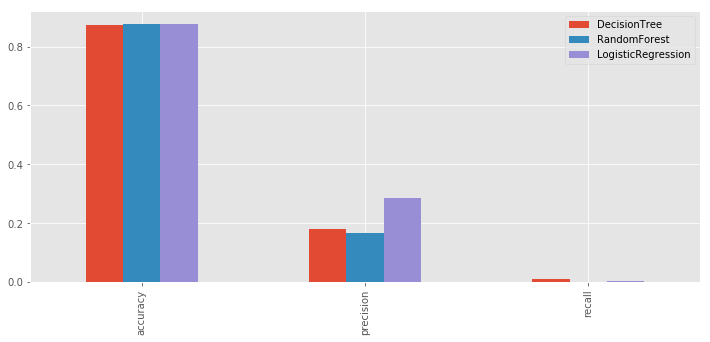

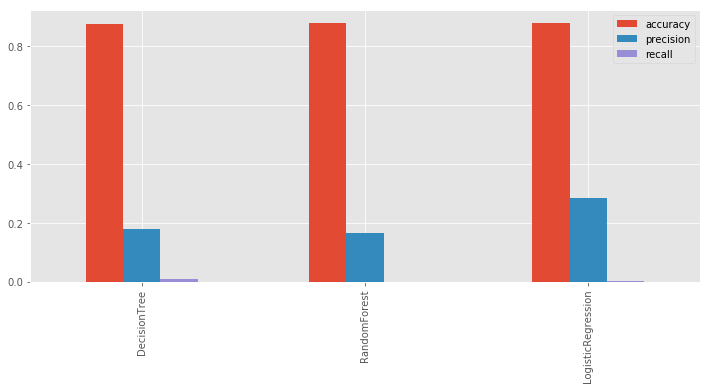

In [46]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

# благодаря V2 это просто ;)
df_metric.plot.bar()
df_metric.T.plot.bar()

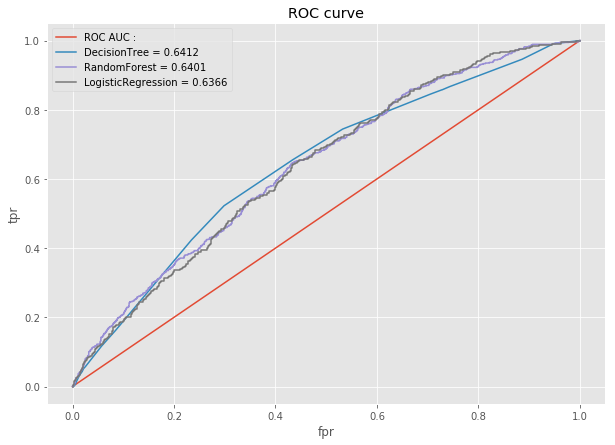

In [47]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve
def roc_auc_plot(y_valid, predict, legend_ls, name):
    fpr, tpr, thresholds = roc_curve(y_valid, predict)
    plt.plot(fpr, tpr)
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.title('ROC curve')
    legend_ls.append(name+' = '+str(round(roc_auc_score(y_valid, predict),4)))
    plt.legend(legend_ls)

plt.figure(figsize=(10, 7))
legend_ls = ['ROC AUC :',]
plt.plot([0, 1], [0, 1])
roc_auc_plot(y_valid, dtc_predict_proba[:,1], legend_ls, 'DecisionTree')
roc_auc_plot(y_valid, rfc_predict_proba[:,1], legend_ls, 'RandomForest')
roc_auc_plot(y_valid, lr_predict_proba[:,1], legend_ls, 'LogisticRegression')
plt.legend(legend_ls)
plt.show()

In [48]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

print('DecisionTree: ', cross_val_score(DecisionTreeClassifier(random_state=42, max_depth=5),
                X_train,y_train,scoring='roc_auc',cv = 10).mean())
print('RandomForest: ', cross_val_score(RandomForestClassifier(random_state=42, max_depth=15),
                X_train,y_train,scoring='roc_auc',cv = 10).mean())
print('LogisticRegression: ', cross_val_score(LogisticRegression(random_state=42),
                X_train,y_train,scoring='roc_auc',cv = 10).mean())


DecisionTree:  0.601650980715219
RandomForest:  0.6247615794141734
LogisticRegression:  0.6306415465157807


In [49]:
# после небольшего перебора параметров выбрал этот вариант
print('LogisticRegression: ', cross_val_score(LogisticRegression(penalty='l1', 
                                                                 C=0.2,
                                                                 random_state=42,),
                X_train,y_train,scoring='roc_auc',cv = 10).mean())

LogisticRegression:  0.6831219682928119


In [50]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
lr = LogisticRegression(penalty='l1', C=0.2, random_state=42, )
lr.fit(X, y)
predict = lr.predict_proba(X_test)
print('roc_auc:', '\t', roc_auc_score(y_test, predict[:,1]))

roc_auc: 	 0.7018286582718193


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


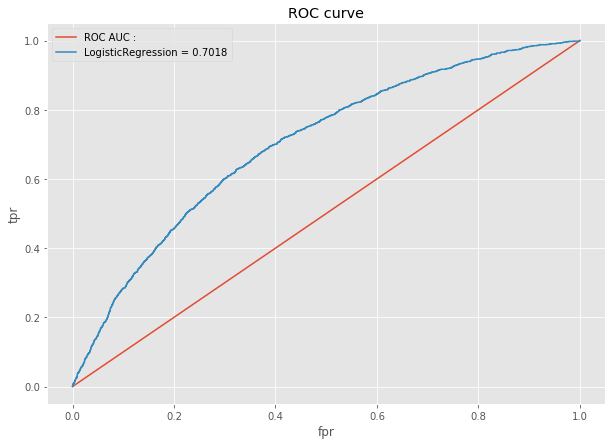

In [51]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
plt.figure(figsize=(10, 7))
legend_ls = ['ROC AUC :',]
plt.plot([0, 1], [0, 1])
roc_auc_plot(y_test, predict[:,1], legend_ls, 'LogisticRegression')
plt.legend(legend_ls)
plt.show()

## Your Code Here

### получил результат лучше чем у победителя конкурса!
согласно лидерборду http://www.machinelearning.ru/wiki/index.php?title=Итоги_конкурса_предсказания_отклика_клиентов_ОТП_Банка
![title](img/queen-original.png)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [52]:
### И далее ;)

# Совершенству нет предела...

In [53]:
# вернемся к данным, что там у нас с таргетом что метрики так скачут
df['TARGET'].value_counts()

0    26571
1     3562
Name: TARGET, dtype: int64

In [115]:
# так у нас сильный дисбаланс, 
# еслиб мы вообще забили на предсказание 1 и всегда слали 0 то accuracy была бы в районе 88% )))

In [55]:
# продолжим работу с данными
# давай посмотрим какие из нагенерированых фитчей у нас дали что-то (спасибо lesson3)
lr = LogisticRegression(penalty='l1', C=0.3, random_state=42, )
lr.fit(X, y)

coefs = lr.coef_[0]
feature = X.columns.values.tolist()
weights = pd.Series(index=feature, data=coefs)

In [56]:
weights.sort_values()

NAN_GROUP                                              -0.873391
POSTAL_ADDRESS_PROVINCE_Мордовская республика          -0.444811
EDUCATION_5                                            -0.444719
GEN_INDUSTRY_Наука                                     -0.406462
GEN_INDUSTRY_Энергетика                                -0.405836
REGION_NM_ПРИВОЛЖСКИЙ                                  -0.405208
GEN_INDUSTRY_Строительство                             -0.316158
TP_PROVINCE_Краснодарский край                         -0.309293
REG_ADDRESS_PROVINCE_Ставропольский край               -0.304276
FACT_ADDRESS_PROVINCE_Волгоградская область            -0.292440
LOAN_NUM_CLOSED                                        -0.274195
EDUCATION_6                                            -0.272921
MARITAL_STATUS_Состою в браке                          -0.237551
FAMILY_INCOME_1                                        -0.212630
GAR_PRESENCE_FL                                        -0.211454
SOCSTATUS_PENS_FL        

In [57]:
# Добавим ка PREVIOUS_CARD_NUM_UTILIZED в One hot encoding
# не зря старались NAN_GROUP дала свое - можно изучить ее подробней
# update похоже наша таинственная NAN_GROUP - это безработные, поэтому у них нет информации о работе :)

In [58]:
from sklearn.preprocessing import RobustScaler

encoding_columns=['MARITAL_STATUS','GEN_INDUSTRY', 'GEN_TITLE',
              'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR',
               'EDUCATION','FAMILY_INCOME','REG_ADDRESS_PROVINCE',
                 'TP_PROVINCE', 'REGION_NM', 
                  'PREVIOUS_CARD_NUM_UTILIZED']

def convert_to_float(df, column):
    return df[column].map(lambda x: x.replace(',', '.')).astype('float')

def preproc_data(df_input):
    df_output = df_input.copy()
    # 1. Удаляем идентификатор AGREEMENT_RK
    df_output = df_output.drop('AGREEMENT_RK', axis = 1)

    # 2. Избавлялась от проблем с '.' и ',' 
    #в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    convert_columns=['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']

    for column in convert_columns:
        df_output[column] = convert_to_float(df_output, column)

    # 3. Выделяем группу где пропуски
    df_output['NAN_GROUP']=0
    df_output.loc[df_output['GEN_INDUSTRY'].isnull()
                  & df_output['GEN_TITLE'].isnull()
                  & df_output['ORG_TP_STATE'].isnull()
                  & df_output['ORG_TP_FCAPITAL'].isnull()
                  & df_output['JOB_DIR'].isnull()
                  & df_output['WORK_TIME'].isnull(), 'NAN_GROUP'] = 1

    # 4. LabelEncoder    
    tmp_list = list(set(df_output['EDUCATION']))
    df_output['EDUCATION'] = df_output.EDUCATION.apply(lambda x: tmp_list.index(x))

    tmp_list = list(set(df_output['FAMILY_INCOME']))
    df_output['FAMILY_INCOME'] = df_output.FAMILY_INCOME.apply(lambda x: tmp_list.index(x))
    
    # 5. Убираем Nan
    # для WORK_TIME сделаем 2 варианта с median и 0, посмотрим что будет лучше для модели
    df_output['WORK_TIME_nan_median'] = df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].median())
    df_output.loc[df_output['GEN_INDUSTRY'].isnull()
                  & df_output['GEN_TITLE'].isnull()
                  & df_output['ORG_TP_STATE'].isnull()
                  & df_output['ORG_TP_FCAPITAL'].isnull()
                  & df_output['JOB_DIR'].isnull()
                  & df_output['WORK_TIME'].isnull(), 'WORK_TIME_nan_median'] = 0
    df_output['WORK_TIME'].fillna(-1, inplace = True)

    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace = True)

    # свои придумки
    df_output['LOAN_AVG_DLQ_AMT_Binar']= 0
    df_output.loc[df_output['LOAN_AVG_DLQ_AMT'] > 0, 'LOAN_AVG_DLQ_AMT_Binar'] = 1
    df_output['LOAN_MAX_DLQ_AMT_Binar']= 0
    df_output.loc[df_output['LOAN_MAX_DLQ_AMT'] > 0, 'LOAN_MAX_DLQ_AMT_Binar'] = 1
    df_output['CREDIT_Binar']= 0
    df_output.loc[df_output['CREDIT'] > 0, 'CREDIT_Binar'] = 1
    
    # у нас есть 4 калонки с адресами которые сильно увеличивают размерность таблицы при One hot encoding
    # давай оптимизируем это

    df_output['REG_ADDRESS_IS_FACT'] = 0
    df_output.loc[df_output['REG_ADDRESS_PROVINCE'] == df_output['FACT_ADDRESS_PROVINCE']
                  , 'REG_ADDRESS_IS_FACT'] = 1
    df_output['REG_ADDRESS_IS_TP'] = 0
    df_output.loc[df_output['REG_ADDRESS_PROVINCE'] == df_output['TP_PROVINCE']
                  , 'REG_ADDRESS_IS_TP'] = 1
    df_output['FACT_ADDRESS_IS_TP'] = 0
    df_output.loc[df_output['FACT_ADDRESS_PROVINCE'] == df_output['TP_PROVINCE']
                  , 'FACT_ADDRESS_IS_TP'] = 1
    df_output.drop('FACT_ADDRESS_PROVINCE', axis = 1, inplace = True)
    df_output.drop('POSTAL_ADDRESS_PROVINCE', axis = 1, inplace = True)
    
    df_output.fillna(-1, inplace = True)
    # 6. One hot encoding
    df_output = pd.get_dummies(df_output, columns=encoding_columns)

    return df_output

In [59]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

y = df_train_preproc.TARGET.values
X = df_train_preproc.drop(['TARGET'], axis=1)

y_test = df_test_preproc.TARGET.values
X_test = df_test_preproc.drop(['TARGET'], axis=1)

from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
df_preproc.to_csv('df_preproc.csv', index=False)

In [61]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 295 entries, TARGET to PREVIOUS_CARD_NUM_UTILIZED_2.0
dtypes: float64(7), int64(38), uint8(250)
memory usage: 9.0 MB


In [62]:
null_colums = df_preproc.columns[df_preproc.isnull().any()]
df_preproc[null_colums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Empty DataFrame

In [63]:
print('LogisticRegression: ', cross_val_score(LogisticRegression(penalty='l1', 
                                                                 C=0.2,
                                                                 random_state=42,),
                X,y,scoring='roc_auc',cv = 10).mean())

LogisticRegression:  0.684431281116711


![title](img/good.jpg)

In [64]:
# вот и еще чуть выжали, поехали дальше
# А что там у нас с числовыми данными

In [65]:
for colum in df.columns:
    c = len(df[colum].value_counts())
    if c > 50:
        print(len(df[colum].value_counts()), colum)

30133 AGREEMENT_RK
373 PERSONAL_INCOME
82 REG_ADDRESS_PROVINCE
83 FACT_ADDRESS_PROVINCE
82 POSTAL_ADDRESS_PROVINCE
70 TP_PROVINCE
12911 CREDIT
4655 FST_PAYMENT
525 FACT_LIVING_TERM
372 WORK_TIME
88 LOAN_NUM_PAYM
1942 LOAN_AVG_DLQ_AMT
1669 LOAN_MAX_DLQ_AMT


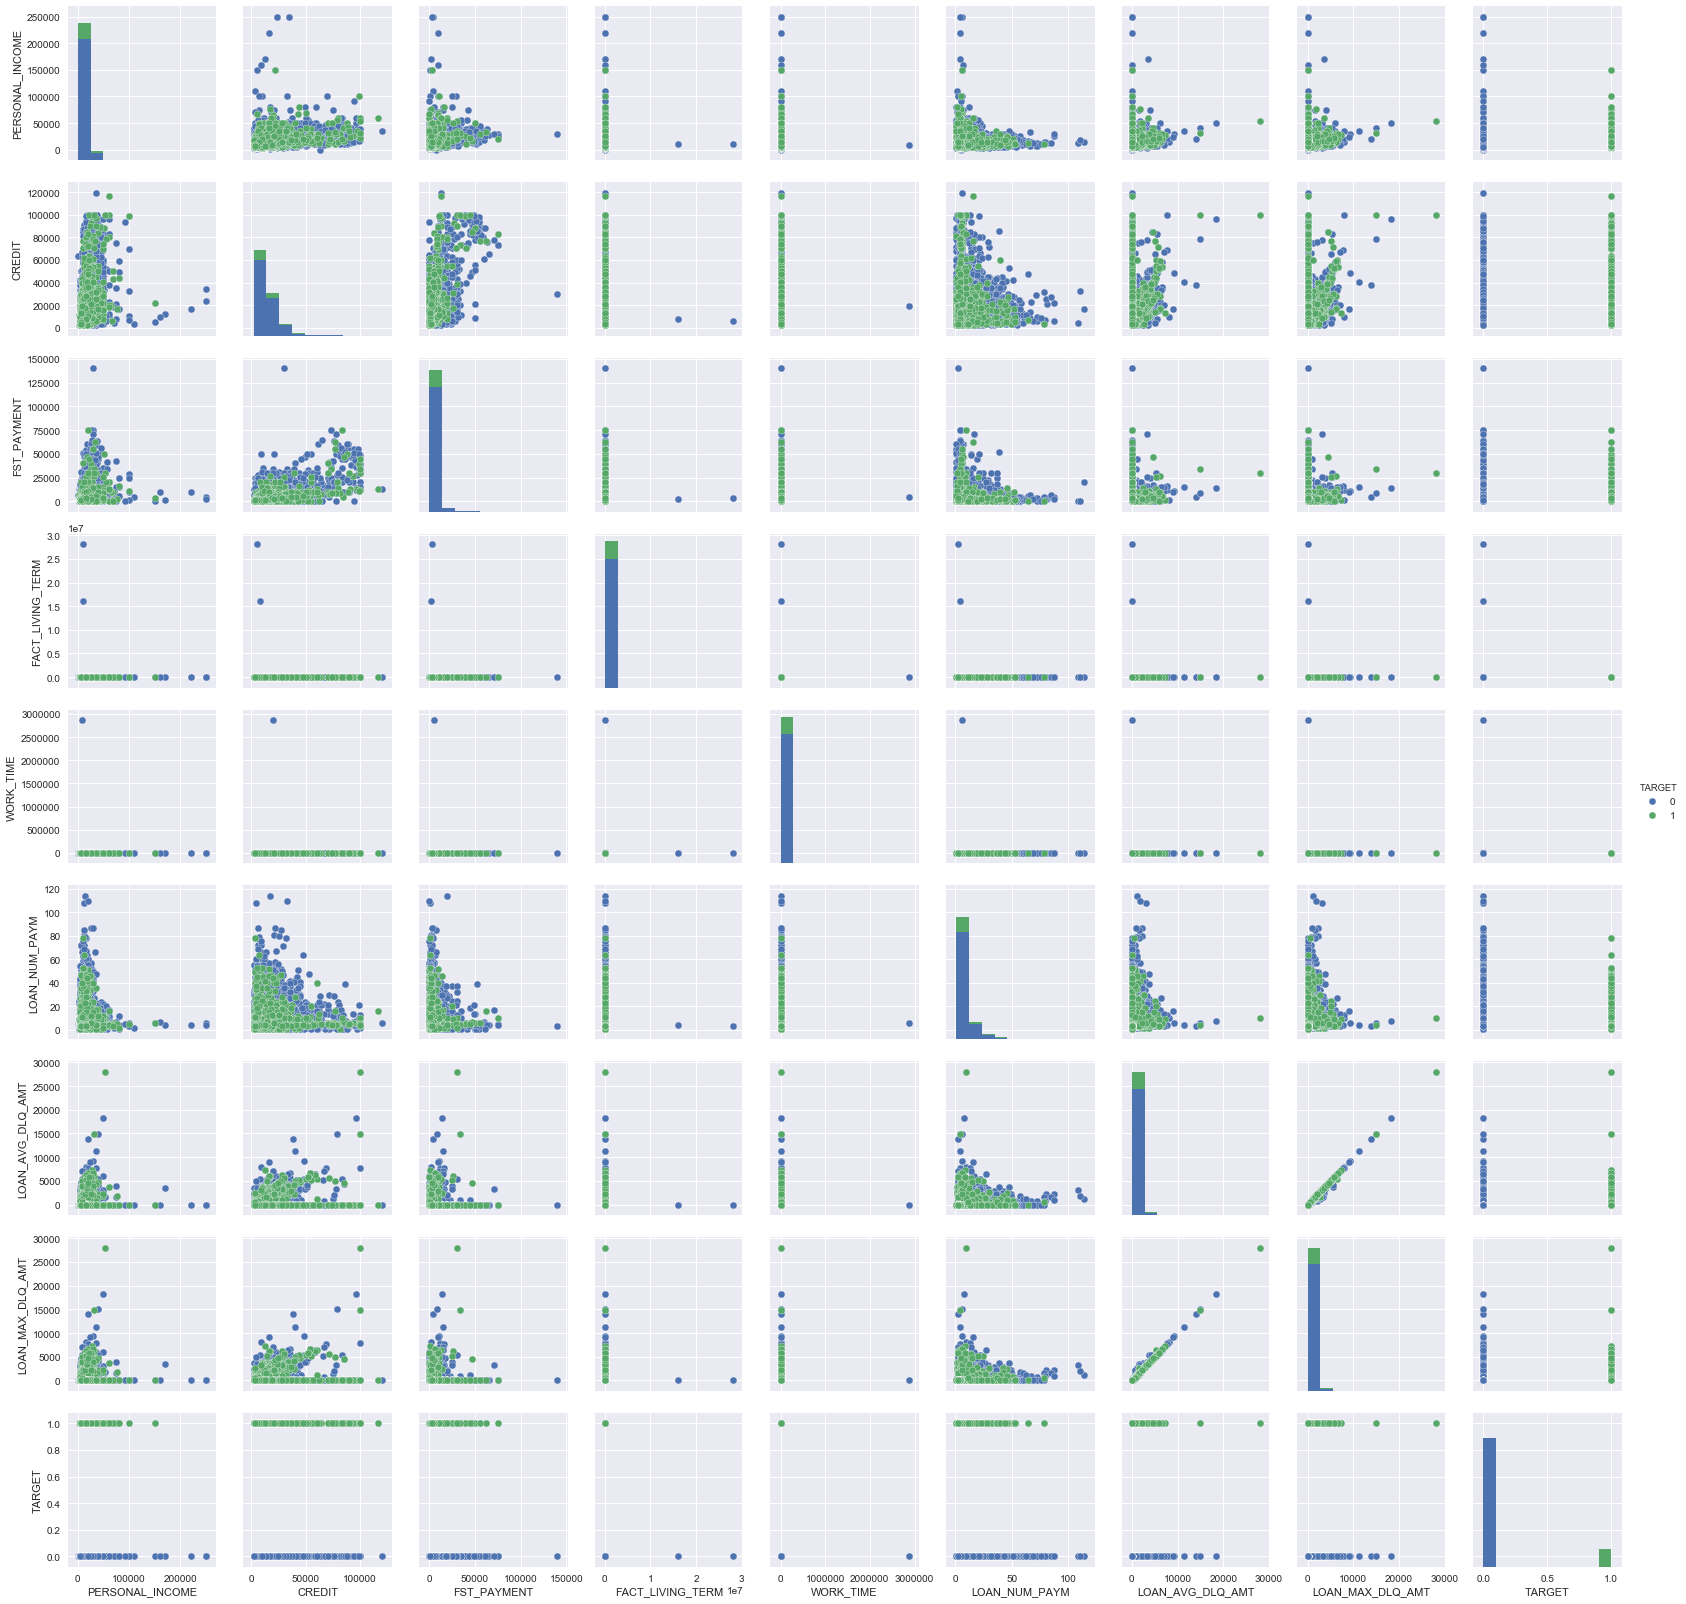

In [66]:
import seaborn as sns
sns.pairplot(df_train_preproc[['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT','FACT_LIVING_TERM',
                'WORK_TIME', 'LOAN_NUM_PAYM', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'TARGET']],
             hue='TARGET')

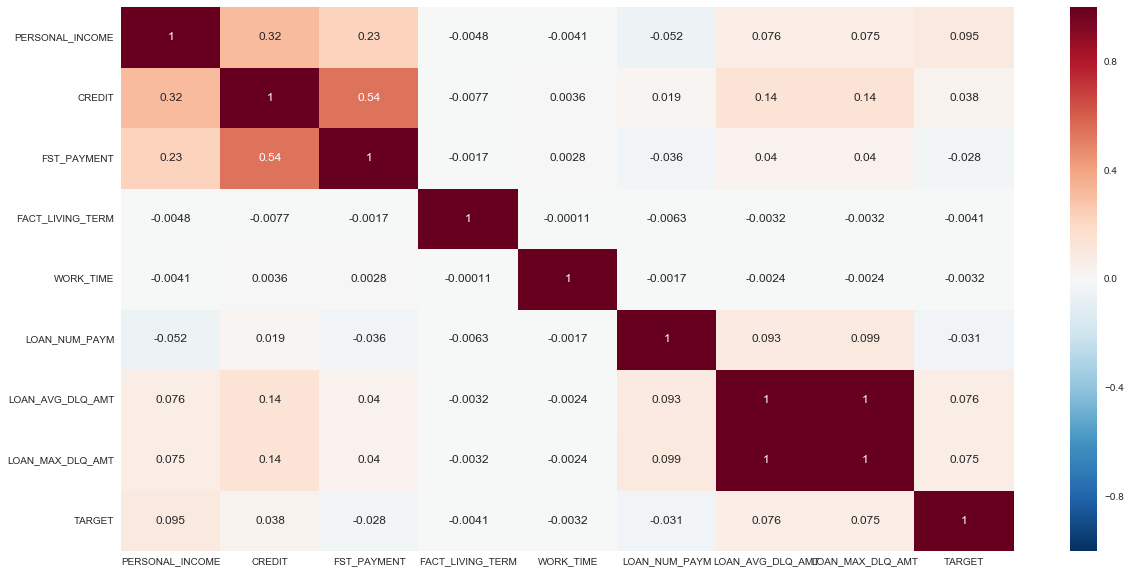

In [67]:
_, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_train_preproc[['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT','FACT_LIVING_TERM',
                'WORK_TIME', 'LOAN_NUM_PAYM', 'LOAN_AVG_DLQ_AMT',
                              'LOAN_MAX_DLQ_AMT', 'TARGET']].corr(), annot=True, ax=ax)
# вижу связь с 'LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT' и 'CREDIT' посмотрим что там

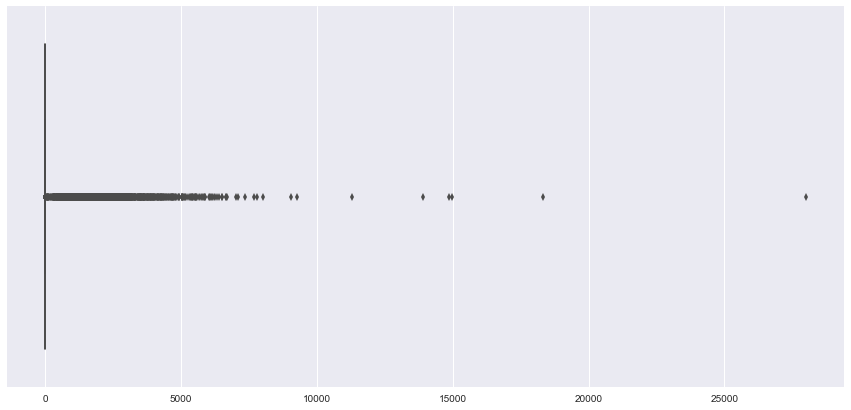

In [68]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot([df_train_preproc.TARGET, df_train_preproc.LOAN_AVG_DLQ_AMT])

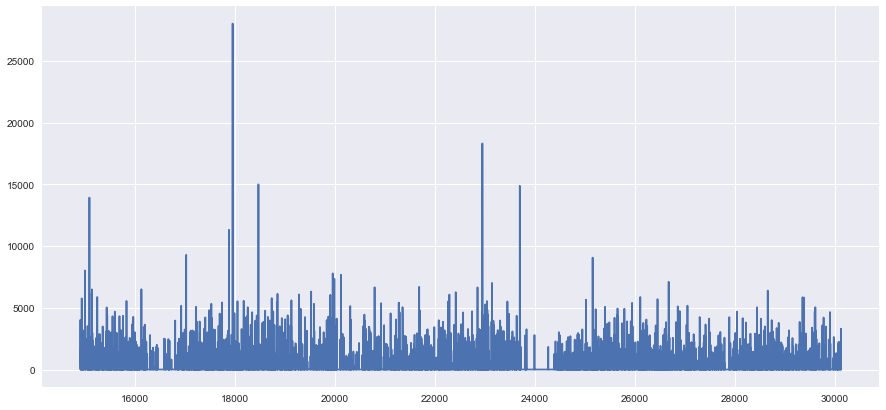

In [69]:
plt.plot(df_train_preproc['LOAN_AVG_DLQ_AMT'],)

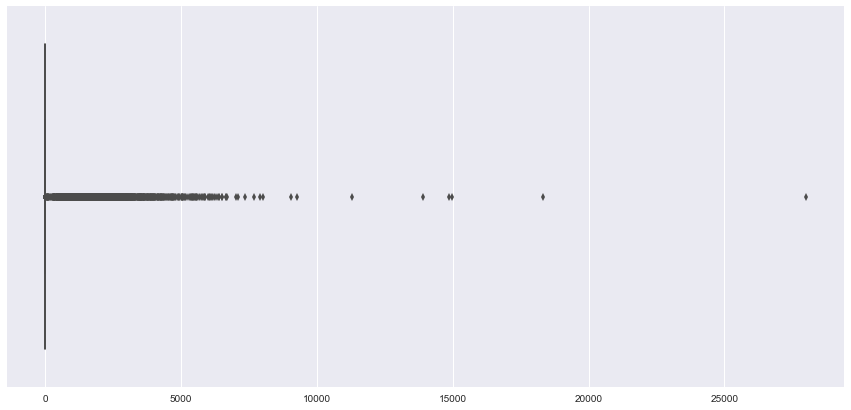

In [70]:
sns.boxplot([df_train_preproc.TARGET, df_train_preproc.LOAN_MAX_DLQ_AMT])

In [71]:
df_train_preproc.LOAN_MAX_DLQ_AMT.describe()
# не гуд, закодирую категориально когда от 0 и выше

count    15223.000000
mean       243.021626
std        836.100116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      28012.200000
Name: LOAN_MAX_DLQ_AMT, dtype: float64

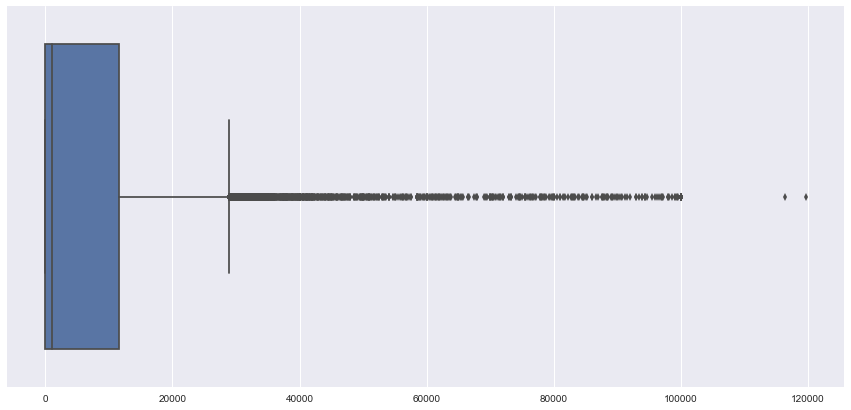

In [72]:
sns.boxplot([df_train_preproc.TARGET, df_train_preproc.CREDIT])
# аналогично

In [73]:
df_train_preproc.CREDIT.describe()

count     15223.000000
mean      14667.959345
std       12147.873496
min        2000.000000
25%        6500.000000
50%       11550.000000
75%       19170.000000
max      119700.000000
Name: CREDIT, dtype: float64

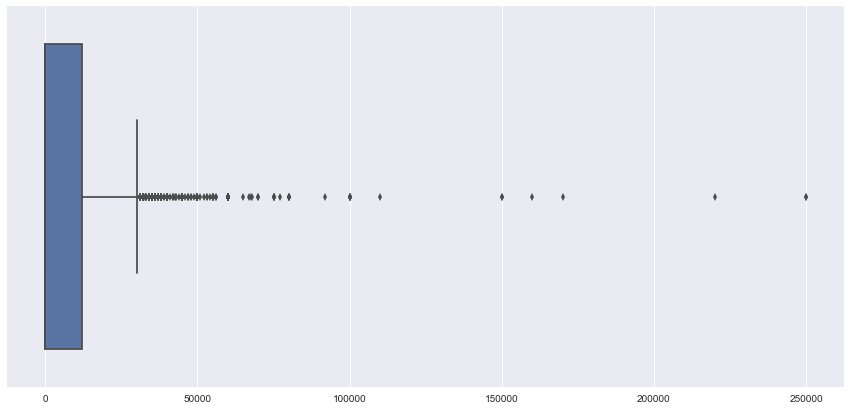

In [74]:
sns.boxplot([df_train_preproc.TARGET, df_train_preproc.PERSONAL_INCOME])
#PERSONAL_INCOME

In [75]:
df_train_preproc.PERSONAL_INCOME.describe()

count     15223.000000
mean      13853.836323
std        9015.467617
min          24.000000
25%        8000.000000
50%       12000.000000
75%       17000.000000
max      250000.000000
Name: PERSONAL_INCOME, dtype: float64

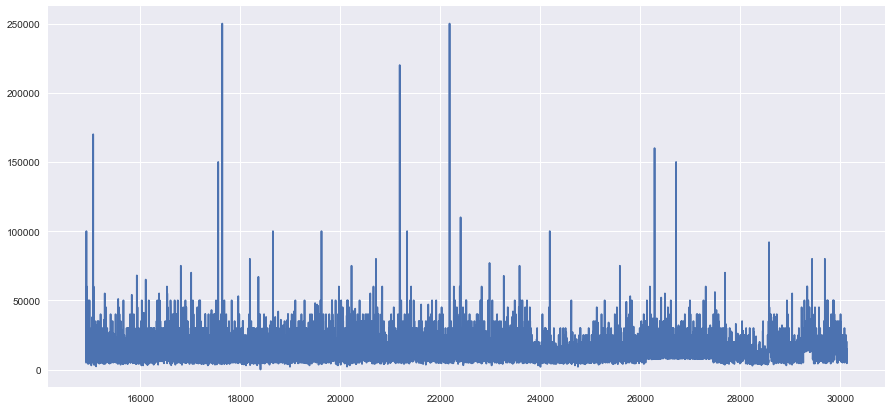

In [76]:
plt.plot(df_train_preproc['PERSONAL_INCOME'],)

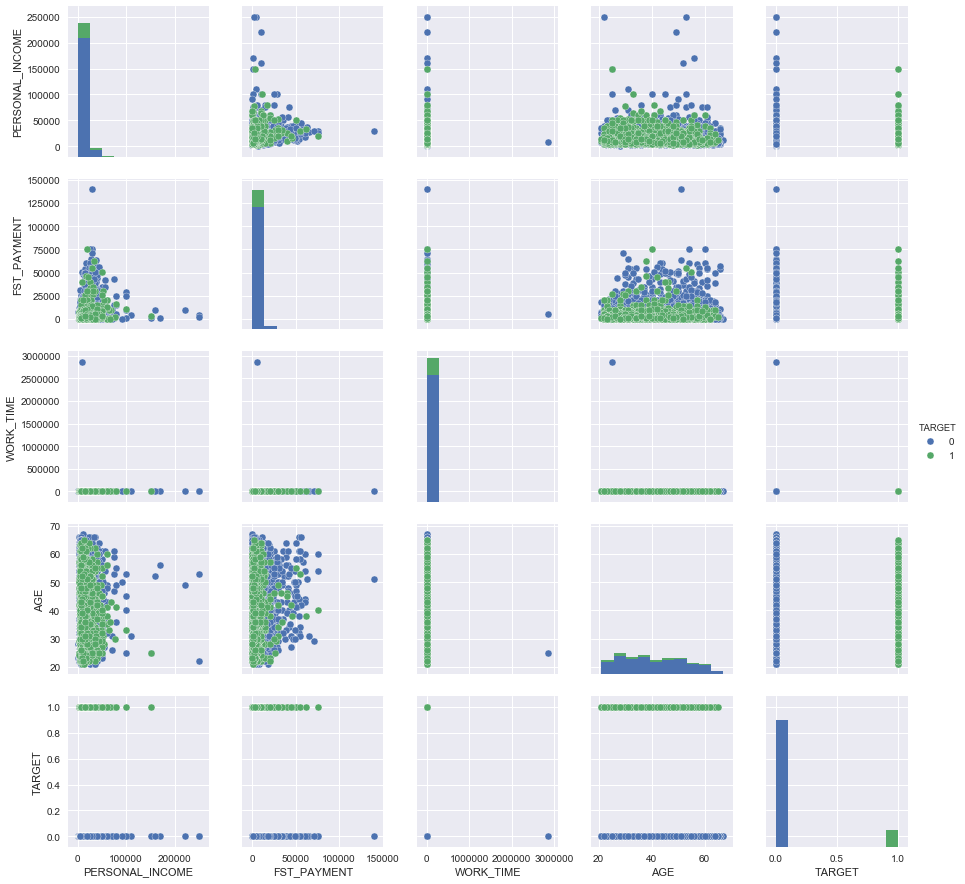

In [77]:
sns.pairplot(df_train_preproc[['PERSONAL_INCOME', 'FST_PAYMENT', 'WORK_TIME', 'AGE', 'TARGET']],
             hue='TARGET')

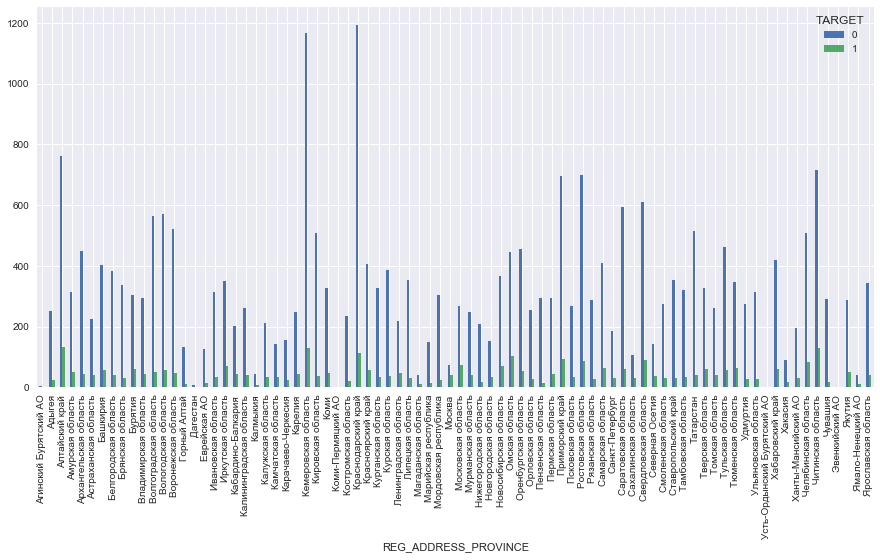

In [78]:
ct = pd.crosstab(df.REG_ADDRESS_PROVINCE, df.TARGET)
ct.plot(kind='bar')

In [79]:
# Думаю на этом пока остановимся, настало время ML! )

![title](img/a7y4m2.jpg)

In [80]:
# без каких либо оптимизаций гиперпараметров! практически из коробки
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

params = {
'objective':'binary',
'num_leaves': 10,
'learning_rate': 0.01,
'metric': 'auc',
'bagging_fraction': 0.75,
'bagging_freq': 10,
'feature_fraction':0.75,
'lambda_l1':1,
#'min_data_in_leaf': 500
#'is_unbalance':True
'scale_pos_weight':0.88,
'seed':42,
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets = lgb_valid,
                verbose_eval = 100,)

[100]	valid_0's auc: 0.691957
[200]	valid_0's auc: 0.703215
[300]	valid_0's auc: 0.709444
[400]	valid_0's auc: 0.713706
[500]	valid_0's auc: 0.715667


In [81]:
from sklearn.ensemble import GradientBoostingClassifier

# benchmark МЛ либ на отложеной выборке

# LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.2, random_state=42,)
lr.fit(X, y)
lr_predict = lr.predict_proba(X_test)

# GBT
gbt = GradientBoostingClassifier(n_estimators=1000,
                                 learning_rate=0.01,
                                 min_samples_leaf=50,
                                 random_state=42, )
gbt.fit(X, y)
gbt_predict = gbt.predict_proba(X_test)

# Lightgbm
lgb_train = lgb.Dataset(X, y)
gbm = lgb.train(params, lgb_train, num_boost_round=1000,)
lgb_predict = gbm.predict(X_test)

# catboost
from catboost import CatBoostClassifier
cb = CatBoostClassifier(eval_metric='AUC', learning_rate=0.01, l2_leaf_reg=30, random_seed=42,)
cb.fit(X, y, eval_set=(X, y), logging_level='Silent', use_best_model=True,)
cb_predict = cb.predict_proba(X_test)

# mean_predict
mean_predict=np.zeros(len(lr_predict))
for i in range(len(lr_predict)):
    mean_predict[i]=(lr_predict[i,1]+cb_predict[i,1]+lgb_predict[i])/3

print('LogReg roc_auc:', '\t', roc_auc_score(y_test, lr_predict[:,1]))
print('GBTClassifier roc_auc:', '\t', roc_auc_score(y_test, gbt_predict[:,1]))
print('Lightgbm roc_auc:', '\t', roc_auc_score(y_test, lgb_predict))
print('Catboost roc_auc:', '\t', roc_auc_score(y_test, cb_predict[:,1]))
print('Mean_predict roc_auc:', '\t', roc_auc_score(y_test, mean_predict))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogReg roc_auc: 	 0.7018483716891012
GBTClassifier roc_auc: 	 0.7034121146330873
Lightgbm roc_auc: 	 0.7078330004342162
Catboost roc_auc: 	 0.7074427268779852
Mean_predict roc_auc: 	 0.7109708206686931


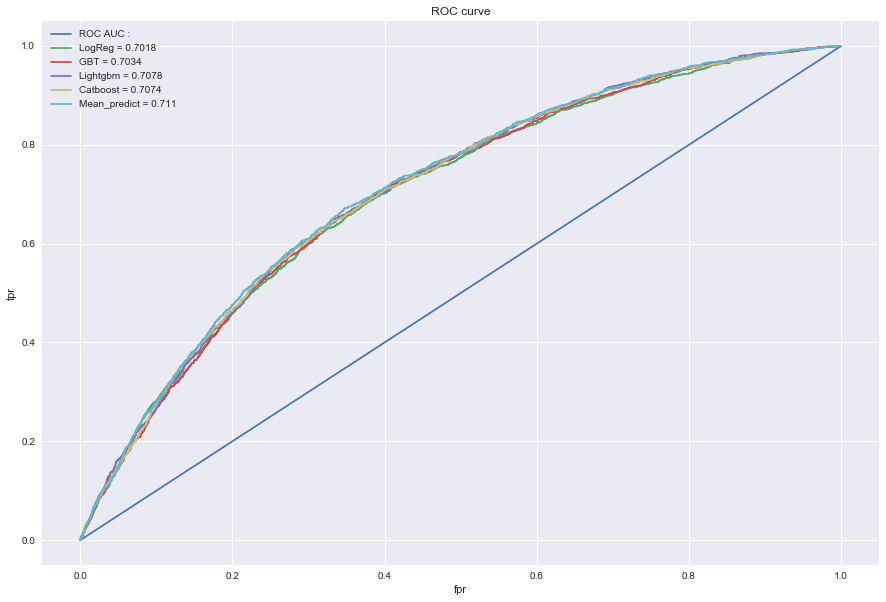

In [82]:
plt.figure(figsize=(15, 10))
legend_ls = ['ROC AUC :',]
plt.plot([0, 1], [0, 1])
roc_auc_plot(y_test, lr_predict[:,1], legend_ls, 'LogReg')
roc_auc_plot(y_test, gbt_predict[:,1], legend_ls, 'GBT')
roc_auc_plot(y_test, lgb_predict, legend_ls, 'Lightgbm')
roc_auc_plot(y_test, cb_predict[:,1], legend_ls, 'Catboost')
roc_auc_plot(y_test, mean_predict, legend_ls, 'Mean_predict')
plt.legend(legend_ls)
plt.show()

![title](img/wq846d.jpg)

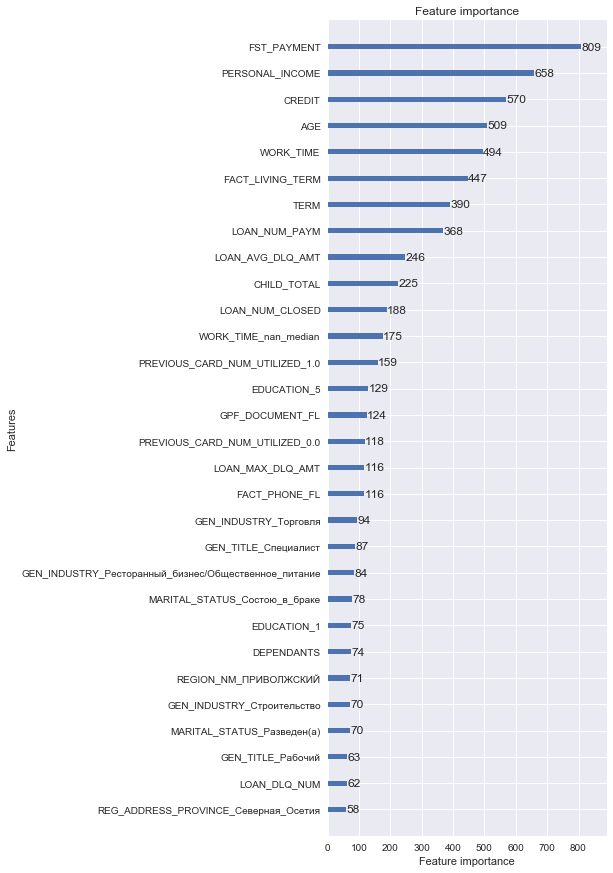

In [83]:
plt.rcParams['figure.figsize'] = (5, 15)
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

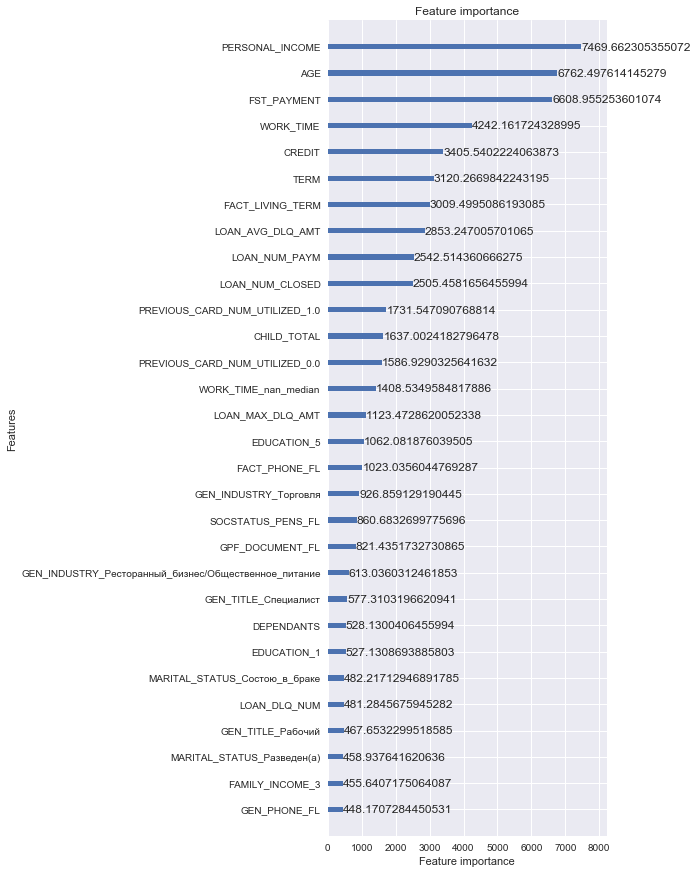

In [84]:
plt.rcParams['figure.figsize'] = (5, 15)
ax = lgb.plot_importance(gbm, max_num_features=30, importance_type='gain',)
plt.show()

![title](img/3d_l.jpg)

In [118]:
# как мы узнали от Андрея Шестакова (lesson04): 
'''One hot encoding - не лучшее решение для деревьев и основных на нем алгоритмах'''
# давай попробуе что-то другое

'One hot encoding - не лучшее решение для деревьев и основных на нем алгоритмах'

### TODO:
* попробуем сделать LabelEncoder но не простой, а сортированного в зависимости от частоты встречаемоего значения (по .value_counts() )
* Target Encoder в зависимости от того как частоты мы встречаем значение в таргете (на трейне)
* сделаем разметку нанов
* попробуем избавиться от выбрасов разбиением на квантили циферных признаков
* и проверим как частоты мы встречаем значение от разных квантилейв в таргете (на трейне)
* подчистим функцию обработки
* максимально уберем фитчи из One hot encodingа

In [191]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [192]:
def predict_proba_models(X, y, X_test):
    # LogisticRegression
    lr = LogisticRegression(penalty='l1', C=0.2, random_state=42,)
    lr.fit(X, y)
    lr_predict = lr.predict_proba(X_test)
    print('LogReg roc_auc:', '\t', roc_auc_score(y_test, lr_predict[:,1]))

    # GBT
    gbt = GradientBoostingClassifier(n_estimators=1000,
                                     learning_rate=0.01,
                                     min_samples_leaf=50,
                                     random_state=42, )
    gbt.fit(X, y)
    gbt_predict = gbt.predict_proba(X_test)
    print('GBTClassifier roc_auc:', '\t', roc_auc_score(y_test, gbt_predict[:,1]))

    # Lightgbm
    lgb_train = lgb.Dataset(X, y)
    gbm = lgb.train(params, lgb_train, num_boost_round=1000,)
    lgb_predict = gbm.predict(X_test)
    print('Lightgbm roc_auc:', '\t', roc_auc_score(y_test, lgb_predict))

    # catboost
    from catboost import CatBoostClassifier
    cb = CatBoostClassifier(eval_metric='AUC', learning_rate=0.01, depth=10, l2_leaf_reg=50, random_seed=42,)
    cb.fit(X, y, eval_set=(X, y), logging_level='Silent', use_best_model=True,)
    cb_predict = cb.predict_proba(X_test)
    print('Catboost roc_auc:', '\t', roc_auc_score(y_test, cb_predict[:,1]))

    # mean_predict
    mean_predict=np.zeros(len(lr_predict))
    for i in range(len(lr_predict)):
        mean_predict[i]=(lr_predict[i,1]+cb_predict[i,1]+gbt_predict[i,1]+lgb_predict[i])/4
    print('Mean_predict roc_auc:', '\t', roc_auc_score(y_test, mean_predict))
    
    # PLOT
    plt.figure(figsize=(15, 10))
    legend_ls = ['ROC AUC :',]
    plt.plot([0, 1], [0, 1])
    roc_auc_plot(y_test, lr_predict[:,1], legend_ls, 'LogReg')
    roc_auc_plot(y_test, gbt_predict[:,1], legend_ls, 'GBT')
    roc_auc_plot(y_test, lgb_predict, legend_ls, 'Lightgbm')
    roc_auc_plot(y_test, cb_predict[:,1], legend_ls, 'Catboost')
    roc_auc_plot(y_test, mean_predict, legend_ls, 'Mean_predict')
    plt.legend(legend_ls)
    plt.show()

In [193]:
def lite_test_lr_cv(X,y):
    print('LogisticRegression: ', 
          cross_val_score(LogisticRegression(penalty='l1', C=0.2,random_state=42,),
                    X,y,scoring='roc_auc',cv = 10).mean())

In [194]:
encoding_columns=[
    'MARITAL_STATUS',
    'GEN_TITLE',
    'ORG_TP_STATE',
    'ORG_TP_FCAPITAL',
    'JOB_DIR',
    'EDUCATION',
    'FAMILY_INCOME', 
    'PREVIOUS_CARD_NUM_UTILIZED', 
    'REGION_NM', 
    'TP_PROVINCE',
    'AGE',
                 ]

def convert_to_float(df, column):
    return df[column].map(lambda x: x.replace(',', '.')).astype('float')

def LabelEncoder_value_counts (df_output, name, revers=False):
    '''LabelEncoder в зависимости от того как частоты мы встречаем значение (по .value_counts() )'''
    tmp_count_ls=df[name].value_counts(ascending=revers, dropna=False) 
    cont_val_set = {}
    for i in range(len(tmp_count_ls)):
        cont_val_set[tmp_count_ls.index[i]]=i+1
    return(df_output.loc[:,  [name]].replace(cont_val_set))


def preproc_data(df_input):
    df_output = df_input.copy()
    # ################### 1. Предобработка ###################################### 
    # 1.1 Удаляем идентификатор AGREEMENT_RK
    df_output = df_output.drop('AGREEMENT_RK', axis = 1)

    # 1.2 Избавлялась от проблем с '.' и ',' 
    #в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    convert_columns=['PERSONAL_INCOME', 'CREDIT', 
                     'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for column in convert_columns:
        df_output[column] = convert_to_float(df_output, column)
        
    ############################################################################
    
    # ################### 2. Обработка NAN ######################################
    # 2.1 кодируем информацию что был нан
    null_colums = df_output.columns[df_output.isnull().any()]
    for n_col in null_colums[:-3]:
        df_output[n_col+'_nans'] = 0
        df_output.loc[df_output[n_col].isnull(), n_col+'_nans'] = 1

    # 2.2 Выделяем группу где пропуски
    df_output['NAN_GROUP']=0
    df_output.loc[df_output['GEN_INDUSTRY'].isnull()
                  & df_output['GEN_TITLE'].isnull()
                  & df_output['ORG_TP_STATE'].isnull()
                  & df_output['ORG_TP_FCAPITAL'].isnull()
                  & df_output['JOB_DIR'].isnull()
                  & df_output['WORK_TIME'].isnull(), 'NAN_GROUP'] = 1

    df_output['WORK_TIME'].fillna(-1, inplace = True)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace = True)
    
    ############################################################################
    
    # ################### 3. Агрегирование numerical engin #############################
    num_col=['PERSONAL_INCOME', 'CREDIT',  'TERM',
             'FST_PAYMENT','FACT_LIVING_TERM', 'WORK_TIME',
             'LOAN_NUM_TOTAL', 'LOAN_NUM_PAYM', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for column in num_col:
        col_name = column+'_up_zero'
        df_output[col_name]= 0
        df_output.loc[df_output[column] > 0, col_name] = 1
        df_output[col_name+'in_Target'] = \
            df_output[col_name].map(df_output[df_output['sample'] == 'train'].groupby(col_name)['TARGET'].mean())
        
        # quantile
        for qi in np.linspace(.25, 1, 3, 0):
            col_name = column+'_up_quantile_'+str(int(qi*100))
            df_output[col_name] = 0
            df_output.loc[df_output[column] > float(df_output[column].quantile(qi)), col_name] = 1
            df_output[col_name+'in_Target'] = \
            df_output[col_name].map(df_output[df_output['sample'] == 'train'].groupby(col_name)['TARGET'].mean())
 
    ###########################################################################################
    
    
    # ############## 4. SMART ENCODING ##################################
    # у нас есть 4 калонки с адресами которые сильно увеличивают размерность таблицы при One hot encoding
    # давай оптимизируем используя разные варианты Encoding
    
    # 4.1 LabelEncoder_value_counts в зависимости от того как частоты мы встречаем значение 
    colms_for_Encoder=[
                        'POSTAL_ADDRESS_PROVINCE',
                        'FACT_ADDRESS_PROVINCE',
                        'TP_PROVINCE',
        #'GEN_INDUSTRY'
                        ]
    for col_n in colms_for_Encoder:
        df_output[col_n+'_LEV'] = \
        LabelEncoder_value_counts(df, col_n, revers=False)
    
    # 4.2 LabelEncoder   
    # оказался хуже чем умный LabelEncoder_value_counts - убрал его вообще
    #tmp_list = list(set(df_output['EDUCATION']))
    #df_output['EDUCATION'] = df_output.EDUCATION.apply(lambda x: tmp_list.index(x))
    #tmp_list = list(set(df_output['FAMILY_INCOME']))
    #df_output['FAMILY_INCOME'] = df_output.FAMILY_INCOME.apply(lambda x: tmp_list.index(x))

    # 4.3 Target Encoder
    colms_for_TEncoder=[
                        'POSTAL_ADDRESS_PROVINCE',
                        'FACT_ADDRESS_PROVINCE', 
                        'TP_PROVINCE',
                        'JOB_DIR', 
                        'SOCSTATUS_WORK_FL',
                        'EDUCATION',
                        'FAMILY_INCOME',
        #'GEN_INDUSTRY',
        'GEN_TITLE',
        'JOB_DIR',
                         ]
    for col_n in colms_for_TEncoder:
        df_output[col_n+'_Target_mean'] = \
        df_output[col_n].map(df_output[df_output['sample'] == 'train'].groupby(col_n)['TARGET'].mean())
    
    ################################################################################

    
    # ######### 5. Clean убираем повторяющуюся информацию по столбцам и не принятую моделями
    df_output.drop(['GEN_INDUSTRY','REG_ADDRESS_PROVINCE',
                            'FACT_ADDRESS_PROVINCE','CHILD_TOTAL',
                            'POSTAL_ADDRESS_PROVINCE'], inplace = True, axis = 1)
    
    df_output.fillna(-1, inplace = True)
    
    # ############## 6. One hot encoding ##########################################
    df_output = pd.get_dummies(df_output, columns=encoding_columns)

    return df_output

In [195]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

y = df_train_preproc.TARGET.values
X = df_train_preproc.drop(['TARGET'], axis=1)

y_test = df_test_preproc.TARGET.values
X_test = df_test_preproc.drop(['TARGET'], axis=1)


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [196]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 317 entries, TARGET to AGE_67
dtypes: float64(54), int64(79), object(1), uint8(183)
memory usage: 36.1+ MB


In [197]:
# смотрим что получилось:
lite_test_lr_cv(X,y)

LogisticRegression:  0.6989234389057442


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogReg roc_auc: 	 0.7117976986539297
GBTClassifier roc_auc: 	 0.7118312635692576
Lightgbm roc_auc: 	 0.7141659140251846
Catboost roc_auc: 	 0.7114261832392532
Mean_predict roc_auc: 	 0.7163405123751628


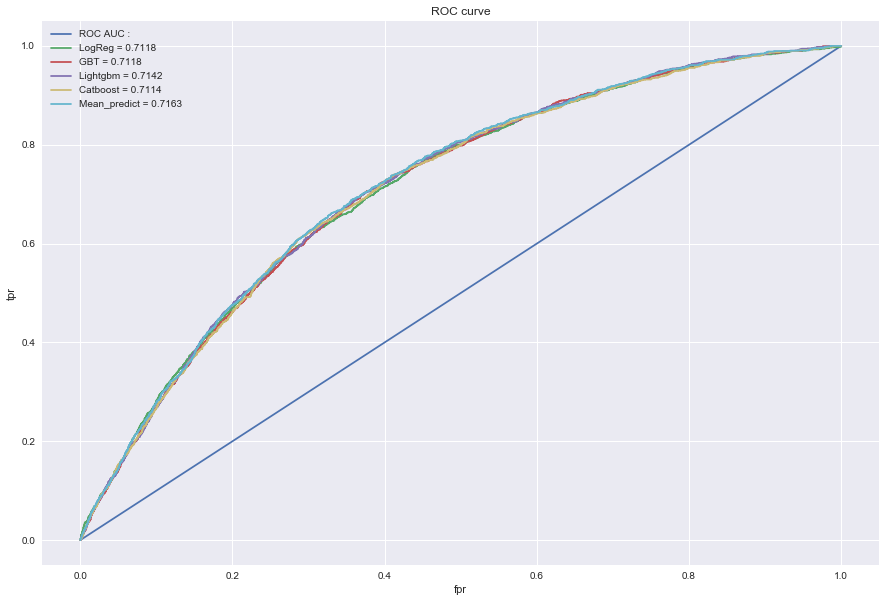

In [198]:
predict_proba_models(X, y, X_test)

In [108]:
# ох ,а еще же осталося простор для feature selection, и в оптимизации гиперпараметров...

![title](img/v-predvkushenii-mem.jpg)

In [109]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [110]:
lr = LogisticRegression(penalty='l1', C=0.2, random_state=42)
sfs = SFS(lr, 
          k_features=25, 
          forward=True, 
          floating=False, 
          scoring='roc_auc',
          verbose=1,
          cv=10,
         n_jobs=4)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 305 out of 305 | elapsed:   21.5s finished
Features: 1/25[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   22.5s
[Parallel(n_jobs=4)]: Done 304 out of 304 | elapsed:   32.3s finished
Features: 2/25[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.1s
[Parallel(n_jobs=4)]: Done 303 out of 303 | elapsed:   30.5s finished
Features: 3/25[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=4)]: Done 302 out of 302 | elapsed:   31.8s finished
Features: 4/25[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   23.7s
[Parallel(n_jobs=4)]: Done 301 out of 301 | elapsed:  

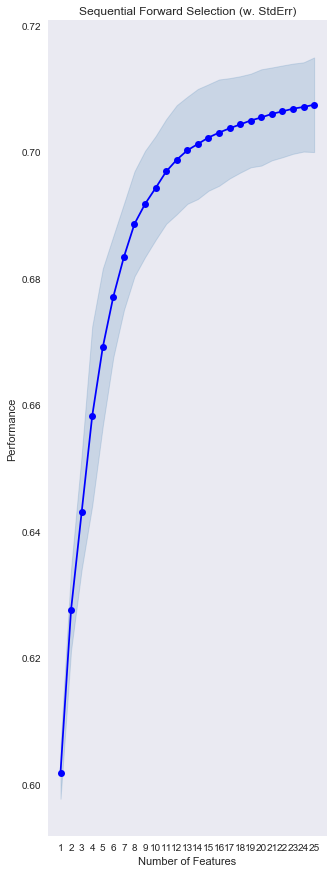

In [111]:
%%time
sfs = sfs.fit(X, y)

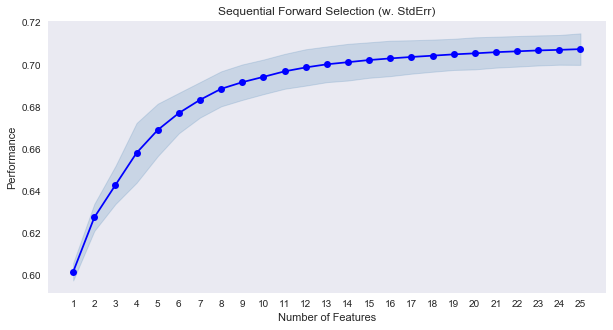

In [207]:
plt.rcParams["figure.figsize"] = (10,5)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

![title](img/shdyn2.jpg)

In [112]:
print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(1, 4, 18, 19, 21, 23, 24, 27, 28, 31, 43, 67, 71, 77, 87, 108, 114, 117, 119, 125, 139, 160, 173, 276, 279)
CV Score:
0.7074385108929324


In [124]:
res = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
features=np.array(res['feature_names'][25])
features

array(['SOCSTATUS_PENS_FL', 'PERSONAL_INCOME', 'TERM', 'FST_PAYMENT',
       'GPF_DOCUMENT_FL', 'WORK_TIME', 'FACT_PHONE_FL', 'LOAN_NUM_TOTAL',
       'LOAN_NUM_CLOSED', 'LOAN_MAX_DLQ',
       'PERSONAL_INCOME_up_quantile_25', 'FST_PAYMENT_up_quantile_25',
       'FST_PAYMENT_up_quantile_75', 'FACT_LIVING_TERM_up_quantile_50',
       'LOAN_NUM_PAYM_up_quantile_75',
       'POSTAL_ADDRESS_PROVINCE_Target_mean', 'JOB_DIR_Target_mean',
       'SOCSTATUS_WORK_FL_Target_sum', 'EDUCATION_Target_sum',
       'MARITAL_STATUS_Разведен(а)', 'GEN_TITLE_Специалист',
       'EDUCATION_Высшее', 'PREVIOUS_CARD_NUM_UTILIZED_1.0', 'AGE_39',
       'AGE_42'], dtype='<U35')

In [127]:
X_feature_Select=X[features]
X_test_feature_Select=X_test[features]

In [201]:
# смотрим что получилось:
lite_test_lr_cv(X_feature_Select,y)

LogisticRegression:  0.7073526693987102


In [128]:
# LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1, random_state=42,)
lr.fit(X_feature_Select, y)
lr_predict = lr.predict_proba(X_test_feature_Select)
print('LogReg roc_auc:', '\t', roc_auc_score(y_test, lr_predict[:,1]))

# Lightgbm
lgb_train = lgb.Dataset(X_feature_Select, y)
gbm = lgb.train(params, lgb_train, num_boost_round=1000,)
lgb_predict = gbm.predict(X_test_feature_Select)
print('Lightgbm roc_auc:', '\t', roc_auc_score(y_test, lgb_predict))

LogReg roc_auc: 	 0.6985540599218412
Lightgbm roc_auc: 	 0.7094427268779854


In [ ]:
# Явно 25 фитч мало для построения хорошей модели, но я и так много времени потратил уже на ДЗ)

![title](img/yps2.jpg)

In [238]:
# Главное вовермя остановиться! :))))

# Итого:

In [208]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 317 entries, TARGET to AGE_67
dtypes: float64(54), int64(79), object(1), uint8(183)
memory usage: 36.1+ MB


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogReg roc_auc: 	 0.7117976986539297
GBTClassifier roc_auc: 	 0.7118312635692576
Lightgbm roc_auc: 	 0.7141659140251846
Catboost roc_auc: 	 0.7114261832392532
Mean_predict roc_auc: 	 0.7163405123751628


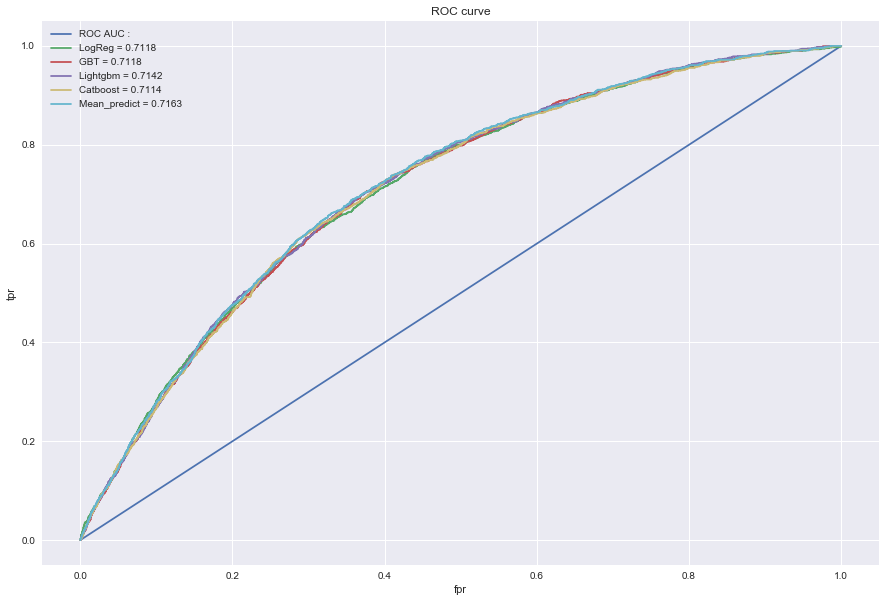

In [202]:
predict_proba_models(X, y, X_test)

![title](img/fin.png)

# Что для себя вынес из ДЗ:
* за Nan может скрываться много полезной взаимосвязи
* Всегда смотри баланс классов в таргете
* не нужно принебрегать LogisticRegression, на ней можно строить модели и они хорошо работают в ансамбле
* Понравилась идея с Target Encoder
* lightgbm BEST! ) но ансамбли круче)
* 'One hot encoding - не лучшее решение для деревьев и основных на нем алгоритмах'

# Что можно было сделать еще:
* Закончить feature selection
* Сделать авто оптимизацию гиперпараметров в Hyperopt
* Собрать больше разных моделей в ансамле
* Посмотреть места где модели ошибаются, можно ли им как-то помочь
* Попытаться интропритировать некоторые взаимосвязи и попробовать сделать фитчи в на их связке

# Пожелания:
* побольше таких ДЗ! 
* давать Score к которому стоит стремиться (можно использовать как порог для прохождения ДЗ) :)

Контакты: 
Телеграм @Alexlekov